# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merged_df[merged_df.duplicated()]
duplicated_data["Mouse ID"]

861    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = merged_df["Mouse ID"] == "g989"
merged_df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaning_mask = merged_df["Mouse ID"] != "g989"
cleaned_df = merged_df.loc[cleaning_mask]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summ_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})

summ_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summ_agg_df = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summ_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

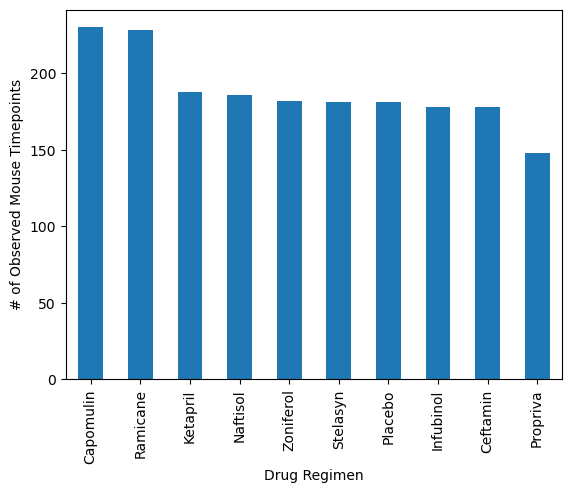

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", x="index", y="values", ylabel="# of Observed Mouse Timepoints")

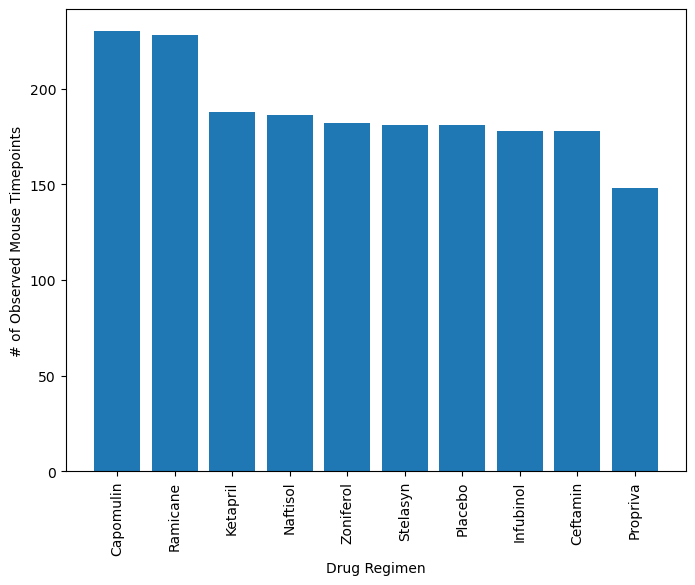

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Step 1: Get the data
# x: Drug Regimen, y: Drug Regimen Value Counts

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.bar(regimen_counts.index, regimen_counts.values)

# Step 4: Customization
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

# Step 5: Show/Save
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

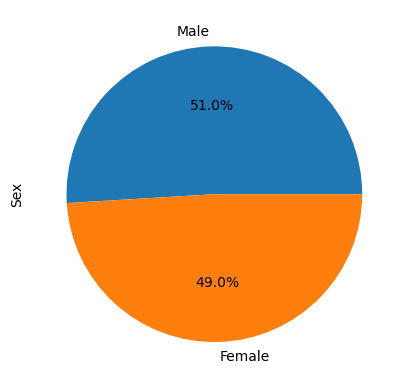

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = cleaned_df["Sex"].value_counts()

mouse_sex.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")

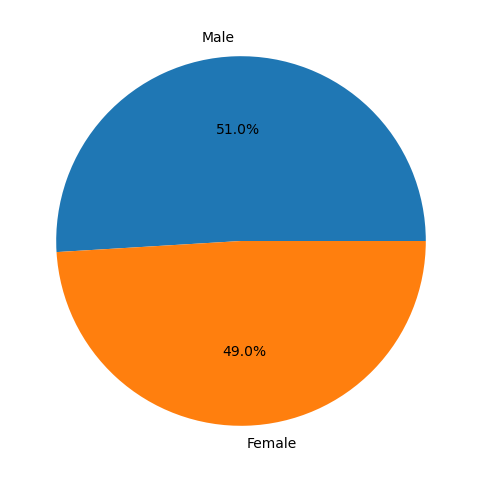

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Step 1: Get the data
# x: Drug Regimen, y: Drug Regimen Value Counts

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.pie(mouse_sex, labels=mouse_sex.index, autopct="%1.1f%%")

# Step 4: Customization

# Step 5: Show/Save

plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
final_vol = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_vol_df = pd.DataFrame({"Mouse ID": final_vol.index, "Timepoint": final_vol.values})
cleaned_df2 = cleaned_df.copy()

vol_merged_df = pd.merge(cleaned_df2, final_vol_df, on=["Mouse ID", "Timepoint"])

filtered_df = vol_merged_df[vol_merged_df["Drug Regimen"].isin(drug_list)].reset_index(drop=True)
filtered_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes

for regimen in filtered_df["Drug Regimen"].unique():
    
    # Filter DataFrame by drug regimen
    regimen_df = filtered_df[filtered_df["Drug Regimen"] == regimen]
    
    # Calculate quartiles for final tumor volume
    q1 = regimen_df["Tumor Volume (mm3)"].quantile(0.25)
    q3 = regimen_df["Tumor Volume (mm3)"].quantile(0.75)
    
    # Calculate IQR, lower bound, upper bound
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    outliers = regimen_df[(regimen_df["Tumor Volume (mm3)"] < lower_bound) | (regimen_df["Tumor Volume (mm3)"] > upper_bound)]["Tumor Volume (mm3)"]

    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in drug_list:

    drug_df = filtered_df[filtered_df["Drug Regimen"] == drug]

    tumor_vol.append(filtered_df["Tumor Volume (mm3)"])
    
    # add subset 

    # Determine outliers using upper and lower bounds
    q1 = drug_df["Tumor Volume (mm3)"].quantile(0.25)
    q3 = drug_df["Tumor Volume (mm3)"].quantile(0.75)
    
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = drug_df[(drug_df["Tumor Volume (mm3)"] < lower_bound) | (drug_df["Tumor Volume (mm3)"] > upper_bound)]["Tumor Volume (mm3)"]

    print(f"{regimen}'s potential outliers: {outliers}")



Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


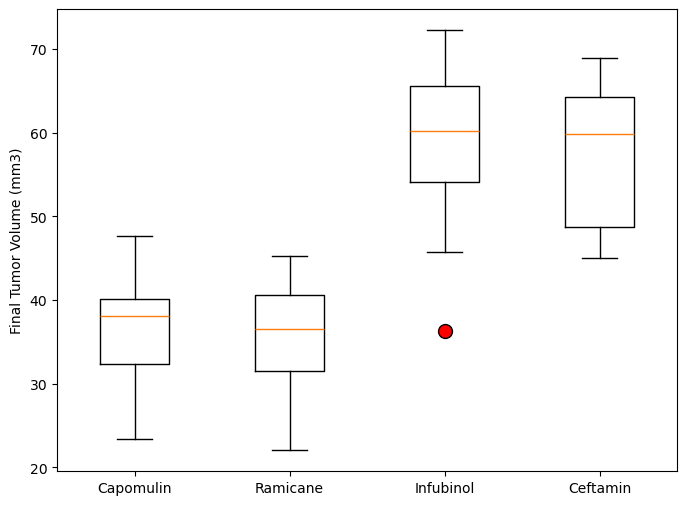

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Step 1: Get the data
# x: Drug Regimen, y: Final Tumor Volume

Capomulin_data = filtered_df[filtered_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Ramicane_data = filtered_df[filtered_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Infubinol_data = filtered_df[filtered_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin_data = filtered_df[filtered_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

columns = [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data]

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.boxplot(columns, meanline=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=10))

# Step 4: Customization
plt.xticks([1, 2, 3, 4], drug_list)
plt.ylabel("Final Tumor Volume (mm3)")

# Step 5: Show/Save

plt.show()

## Line and Scatter Plots

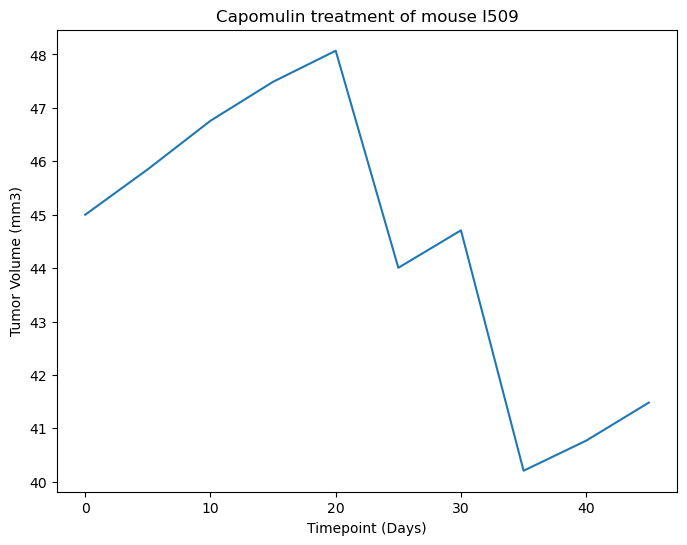

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Get the data
# x: Timepoint, y: Tumor Volume

mouse_mask = (cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "l509")
capo_mouse = cleaned_df.loc[mouse_mask]


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.plot(capo_mouse["Timepoint"], capo_mouse["Tumor Volume (mm3)"])

# Step 4: Customization
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")

# Step 5: Show/Save

plt.show()

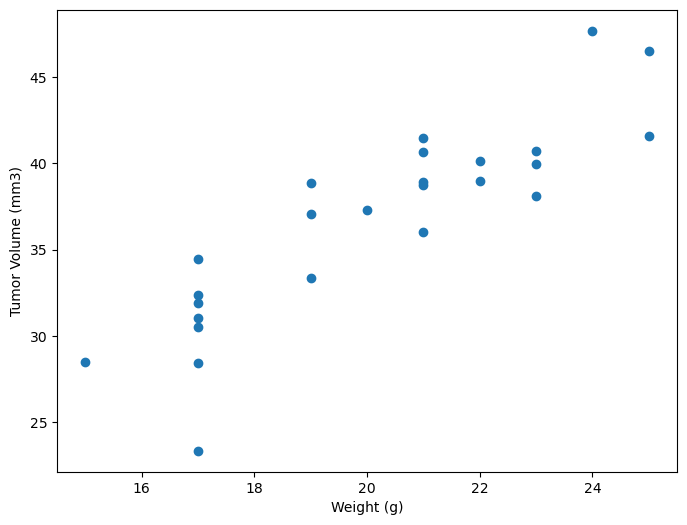

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Get the data
mouse_mask2 = filtered_df["Drug Regimen"] == "Capomulin"
capo_mouse2 = filtered_df.loc[mouse_mask2]

# Calculate the average tumor volume
avg_capo_vol = capo_mouse2.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the scatter plot
plt.scatter(capo_mouse2["Weight (g)"], capo_mouse2["Tumor Volume (mm3)"], label="Observations")

# Step 4: Customization
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# plt.ylim(34, 46)

# Step 5: Show/Save
plt.show()

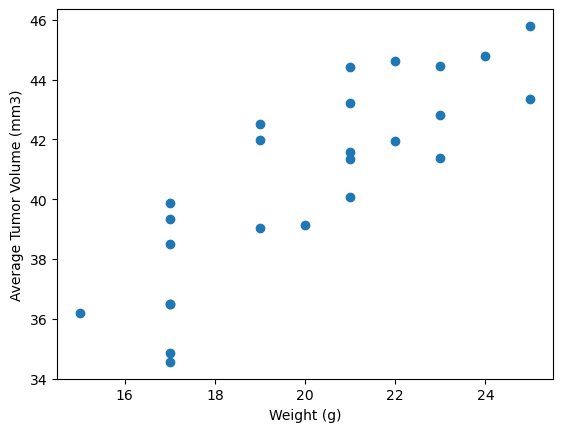

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


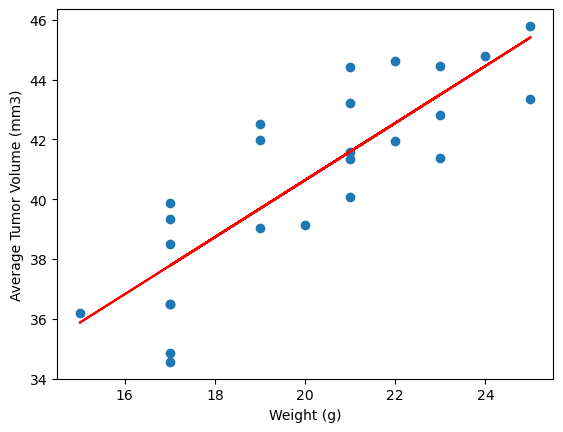

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
